# Lab 6 Report

Simon Chen & Shih-Ming Lin & Cynthia Li

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy import signal
import simpleaudio as sa

## Summary

In this lab, we investigate 2 important Fourier Transform applications: filtering and modulation. We also apply these two to modulate and demodulate a message using Morse Code.

## Assignment 1: Filtering

<ipython-input-3-472b6081a4ba>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig3.add_subplot(1,1,1)


Text(0, 0.5, 'y')

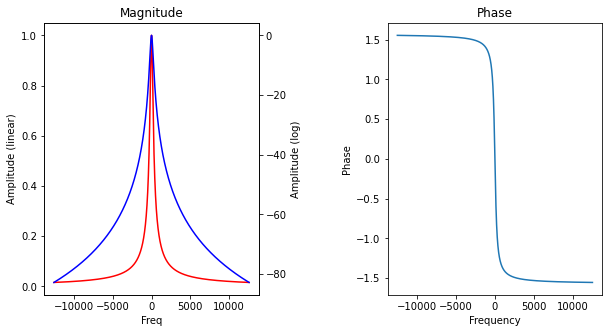

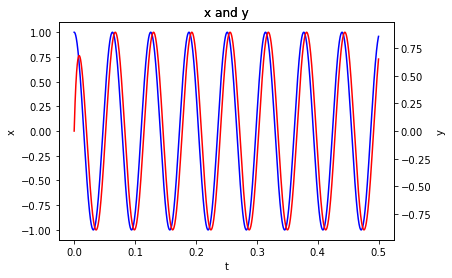

In [3]:
# Assignment 1: Filtering

# Part A
fs = 4000
t = np.arange(0, 0.5, 1/fs)
x1 = np.cos(100*t)


# Part B
nfft = 8192
a = [1, 200]
b = [200]
sys = signal.lti([200],[1,200])
f = np.arange(-nfft/2, nfft/2, 1)*(fs/nfft)
omega = f*2*np.pi
omega2, h_f = signal.freqresp(sys, omega)

fig1, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig1.subplots_adjust(hspace = 0.5, wspace=0.6)

ax1.plot(omega2,np.abs(h_f),'r')
ax1.set_title("Magnitude")
ax1.set_xlabel("Freq")
ax1.set_ylabel("Amplitude (linear)")

ax3 = ax1.twinx()
ax3.plot(omega2,20*np.log(np.abs(h_f)),'b')
ax3.set_ylabel("Amplitude (log)")


ax2.plot(omega2, np.angle(h_f))
ax2.set_title("Phase")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Phase")

# Part C

ty, y1, xs = signal.lsim((b,a),x1,t)

fig3 = plt.figure(3)

plt.title('x and y')
ax1 = fig3.add_subplot(1,1,1)
plt.plot(t, x1, 'b')
plt.ylabel('x')
plt.xlabel('t')

ax2 = ax1.twinx()
plt.title('x and y')
plt.plot(t, y1, 'r')
plt.ylabel('y')

# Discussion
The overall response will be unchanged if we put two identical versions of the above filter in series because it is a Low Pass Filter. So, the amplitude of the response to x1 will be equal to that for a single filter. 

## Assignment 2: Amplitude Modulation

(-500.0, 500.0)

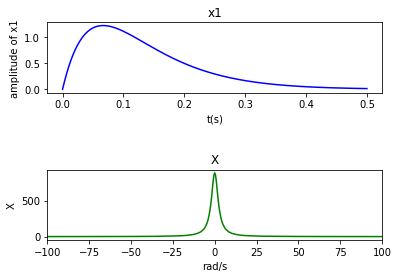

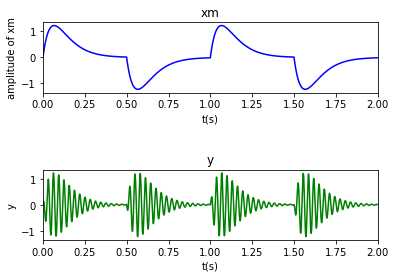

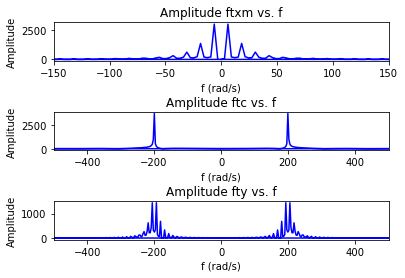

In [4]:
# Assignment 2: Amplitude Modulation

# Part A

def u(t):
    return 1.0*(t>0)

# Part A

x1 = 50*t*np.exp(-15*t)*u(t)
x0 = -x1

fig4 = plt.figure(4)
fig4.subplots_adjust(hspace = 1.1, wspace = 0.5)
plt.subplot(2,1,1)
plt.title('x1')
plt.plot(t, x1, 'b')
plt.ylabel('amplitude of x1')
plt.xlabel('t(s)')

plt.subplot(2,1,2)
ftx = np.fft.fftshift(np.fft.fft(x1, nfft))
df1 = fs / nfft
f1 = np.arange(-fs/2, fs/2, df1)

plt.title('X')
plt.plot(f1, np.abs(ftx), 'g')
plt.ylabel('X')
plt.xlabel('rad/s')
plt.xlim(-100, 100)

# Part B
t2=np.arange(0, 2, 1/fs)
xm=np.concatenate([x1,x0,x1,x0])
c=np.cos(200*t2)
y=xm*c

# Part C
fig5 = plt.figure(5)
fig5.subplots_adjust(hspace = 1.1, wspace = 0.5)
plt.subplot(2,1,1)
plt.title('xm')
plt.plot(t2, xm, 'b')
plt.ylabel('amplitude of xm')
plt.xlabel('t(s)')
plt.xlim(0, 2)

plt.subplot(2,1,2)
plt.title('y')
plt.plot(t2, y, 'g')
plt.ylabel('y')
plt.xlabel('t(s)')
plt.xlim(0, 2)

# Part D

#df2 = fs / nfft
#f2 = np.arange(-fs/2, fs/2, df2)
#ftxm = np.fft.fftshift(np.fft.fft(xm, nfft))
#ftc = np.fft.fftshift(np.fft.fft(c, nfft))
#fty = np.fft.fftshift(np.fft.fft(y, nfft))

f2 = np.fft.fftfreq(nfft,d=1/(2*np.pi*fs))
ftxm = np.fft.fft(xm,nfft)
ftc = np.fft.fft(c,nfft)
fty = np.fft.fft(y,nfft)

fig6 = plt.figure(6)
fig6.subplots_adjust(hspace = 1.3, wspace = 0.8)

plt.subplot(3,1,1)
plt.plot(f2, np.abs(ftxm), 'b-')
plt.title('Amplitude ftxm vs. f')
plt.xlabel('f (rad/s)')
plt.ylabel('Amplitude')
plt.xlim(-150, 150)

plt.subplot(3,1,2)
plt.plot(f2, np.abs(ftc), 'b-')
plt.title('Amplitude ftc vs. f')
plt.xlabel('f (rad/s)')
plt.ylabel('Amplitude')
plt.xlim(-500, 500)

plt.subplot(3,1,3)
plt.plot(f2, np.abs(fty), 'b-')
plt.title('Amplitude fty vs. f')
plt.xlabel('f (rad/s)')
plt.ylabel('Amplitude')
plt.xlim(-500, 500)

###  Discussion
No, it is not LTI. y(t-t0) = x(t-t0)cos(200(t-t0)), T{x(t-t0)}=x(t-t0)cos(200t) As we can see, y(t-t0) ≠ T{x(t-t0)}, so it is Time-varient, not LTI

## Assignment 3: Amplitude Demodulation

<ipython-input-5-7c0d5a44da37>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig8.add_subplot(1,1,1)


(-150.0, 150.0)

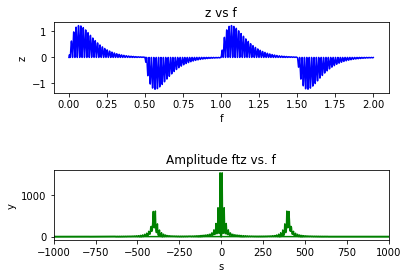

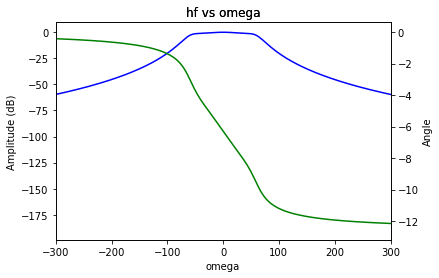

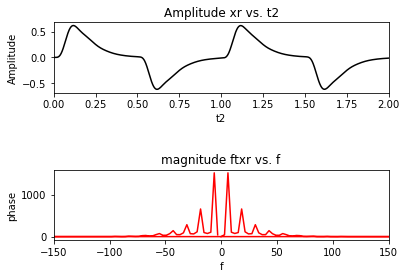

In [5]:
# Assignment 3: Amplitude Demodulation
        
# Part A
z = y*c
ftz = np.fft.fft(z,n=nfft)

fig7 = plt.figure(7)
fig7.subplots_adjust(hspace = 1.1, wspace = 0.5)
plt.subplot(2,1,1)
plt.title('z vs f')
plt.plot(t2, z, 'b')
plt.ylabel('z')
plt.xlabel('f')

plt.subplot(2,1,2)
plt.title('Amplitude ftz vs. f')
plt.plot(f2, np.abs(ftz), 'g')
plt.ylabel('y')
plt.xlabel('s')
plt.xlim(-1000, 1000)

# Part B
a=[240, 30000, 2200000, 100000000,2000000000]
b=[2000000000]

sys = signal.lti(b, a)
f = np.arange(-nfft/2, nfft/2, 1)*(fs/nfft)
omega = f*2*np.pi
omega2,hf = signal.freqresp(sys, omega)

fig8 = plt.figure(8)

plt.title('hf vs omega')
ax1 = fig8.add_subplot(1,1,1)
plt.plot(omega2,20*np.log10(abs(hf)), 'b')
plt.ylabel('Amplitude (dB)')
plt.xlabel('omega')
plt.xlim(-300, 300)


ax2 = ax1.twinx()
plt.title('hf vs omega')
plt.ylabel('Angle')
plt.xlabel('omega')
plt.plot(omega2, np.unwrap(np.angle(hf)), 'g')
plt.xlim(-300, 300)

# Part C
ty, xr, xs = signal.lsim((b,a),z,t2)

fig9 = plt.figure(9)
fig9.subplots_adjust(hspace = 1.1, wspace = 0.5)

plt.subplot(2,1,1)
plt.plot(ty, xr, 'k-')
plt.title('Amplitude xr vs. t2')
plt.xlabel('t2')
plt.ylabel('Amplitude')
plt.xlim(0, 2)

ftxr = np.fft.fft(xr,nfft)

plt.subplot(2,1,2)
plt.plot(f2, np.abs(ftxr), 'r-')
plt.title('magnitude ftxr vs. f')
plt.xlabel('f')
plt.ylabel('phase')
plt.xlim(-150, 150)



# Discussion
The student is incorrect because the bandwidth of x1(t) is now larger, which will lead to aliasing when modulating the signal because time compression will lead to frequency expansion in Fourier domain. It is also not possible that the student obtained the exact same graph because the response to the filter will also be different due to the change in frequency spectrum. 

## Assignment 4: Decoding a Morse Code Message

In [11]:
# Assignment 4: Decoding a Morse Code Message
# Part A
def decode(message):
    morse = ''
    for time in range(4):
        start = time*2000
        end = time*2000 + 2000
        f = message[start:end]
        err_none = np.sum(np.sum((0-f)**2))
        dash_dif = np.sum((x1-f)**2)
        dot_dif = np.sum((x0-f)**2)
        if(err_none < 10):
            continue
        elif(dot_dif < dash_dif):
            morse = morse + '0'
        else:
            morse = morse + '1'
    return morse

X = np.concatenate((x1,x0,x0,x1))
print(decode(X))

1001


In [12]:
#Part B

file = open('message_modulated.csv', 'rb')
messagey = np.loadtxt(file, delimiter=',')

morse = {
  "01": "a",
  "1000": "b",
  "1010": "c",
  "100": "d",
  "0": "e",
  "0010": "f",
  "110": "g",
  "0000": "h",
  "00": "i",
  "0111": "j",
  "101": "k",
  "0100": "l",
  "11": "m",
  "10": "n",
  "111": "o",
  "0110": "p",
  "1101": "q",
  "010": "r",
  "000": "s",
  "1": "t",
  "001": "u",
  "0001": "v",
  "011": "w",
  "1001": "x",
  "1011": "y",
  "1100": "z"
}

carriers = [100, 200, 400]
for carrierFrequency in range(3):
    t = np.arange(0,2,1/fs)
    extractChannel = np.cos(carriers[carrierFrequency]*t)
    demodulate = extractChannel * messagey
    ty, msg_raw, xs = signal.lsim(sys, demodulate, t)
    letter = decode(msg_raw)
    print(letter)
    print("Message m" + str(carrierFrequency+1) + "(t) is: " + str(morse[letter]))

1011
Message m1(t) is: y
111
Message m2(t) is: o
001
Message m3(t) is: u


### Discussion

Lab4's matched Filter is more effective because it is able to tolerate time shifting, which is normal in real signals, while the calculation of the minimum square error does not tolerate time shifting.
The future of technology lies in you.